In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from PDESolver import *


*********************************
* Partial differential equation *
*********************************

               2          
∂             ∂           
──(u(t, x)) = ───(u(t, x))
∂t              2         
              ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))

Expanded equation: Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1, Derivative(u(t, x), (x, 2)): -1}
Final nonlinear terms: []
Symbol terms: []

*******************************
* Linear operator computation *
*******************************


Raw characteristic equation:
  2      
kx 

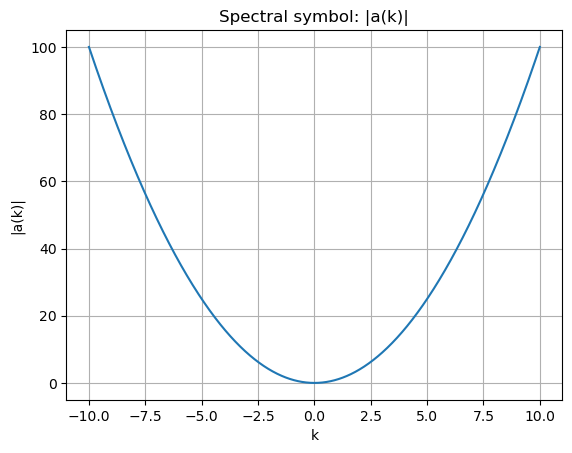


*******************
* Solving the PDE *
*******************

Test error = 9.211e-03


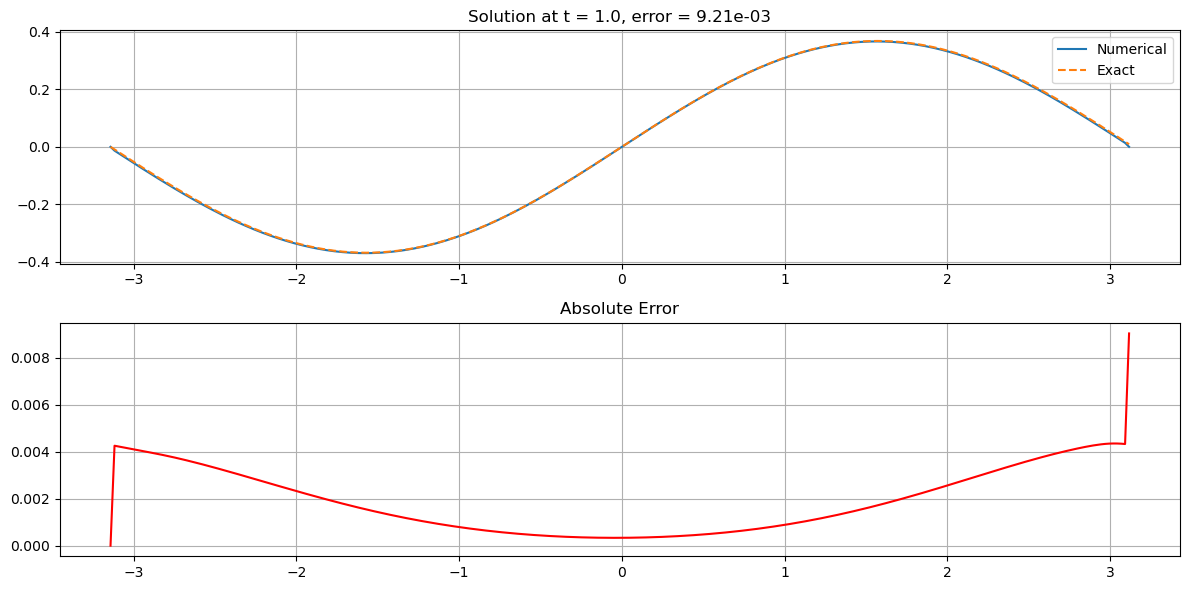

In [3]:
# Define the symbols and the equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

# 1D heat equation
eq = Eq(diff(u, t), diff(u, x, x)) 

# Create the solver
solver = PDESolver(eq)

# Domain and initial condition setup
solver.setup(
    Lx=2 * np.pi, Nx=256, Lt=1.0, Nt=100,
    initial_condition=lambda x: np.sin(x)
)

# Solve the equation
solver.solve()

# Exact solution function at t = 1
def u_exact(x, t):
    return np.sin(x) * np.exp(-t)

# Automatic test
solver.test(u_exact=u_exact, t_eval=1.0, threshold=1e-2)



*********************************
* Partial differential equation *
*********************************

                                  2          
                                 ∂           
                                 ───(u(t, x))
                ⎛  2         ⎞     2         
∂             Op⎝kx , u(t, x)⎠   ∂x          
──(u(t, x)) = ──────────────── + ────────────
∂t                   2                2      

********************
* Equation parsing *
********************


Equation rewritten in standard form: -Op(kx**2, u(t, x))/2 + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))/2

Expanded equation: -Op(kx**2, u(t, x))/2 + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))/2
Temporal derivative order detected: 1
Analyzing term: -Op(kx**2, u(t, x))/2
  --> Detected symbolic operator term (Op), excluded from classification.
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x

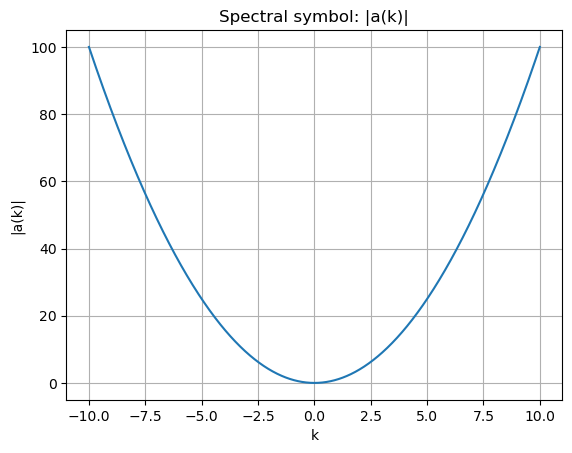


*******************
* Solving the PDE *
*******************

Test error = 9.211e-03


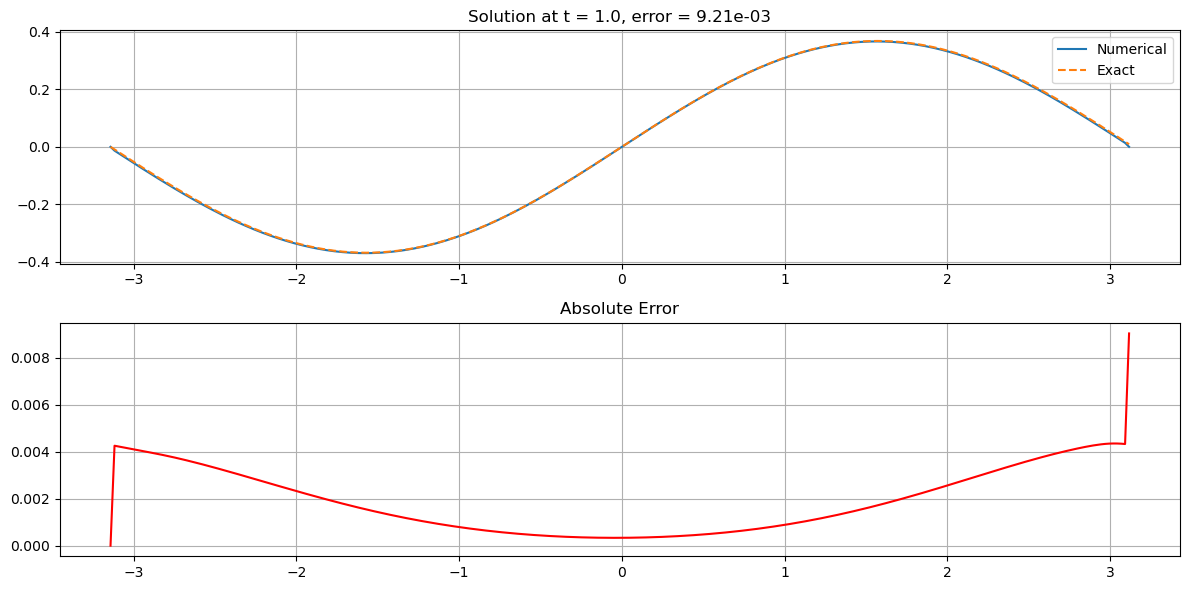

In [4]:
# Define the symbols and the equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

# 1D heat equation
#eq = Eq(diff(u, t),  diff(u, x, 2)) 
eq = Eq(diff(u, t), Op(-(I*kx)**2, u)/2 + diff(u, x, 2)/2)

# Create the solver
solver = PDESolver(eq)

# Domain and initial condition setup
solver.setup(
    Lx=2 * np.pi, Nx=256, Lt=1.0, Nt=100,
    initial_condition=lambda x: np.sin(x)
)

# Solve the equation
solver.solve()

# Exact solution function at t = 1
def u_exact(x, t):
    return np.sin(x) * np.exp(-t)

# Automatic test
solver.test(u_exact=u_exact, t_eval=1.0, threshold=1e-2)



*********************************
* Partial differential equation *
*********************************

 2              2          
∂              ∂           
───(u(t, x)) = ───(u(t, x))
  2              2         
∂t             ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x), (t, 2)) - Derivative(u(t, x), (x, 2))

Expanded equation: Derivative(u(t, x), (t, 2)) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 2
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1, Derivative(u(t, x), (x, 2)): -1}
Final nonlinear terms: []
Symbol terms: []

*******************************
* Linear operator computation *
*******************************


Raw characte

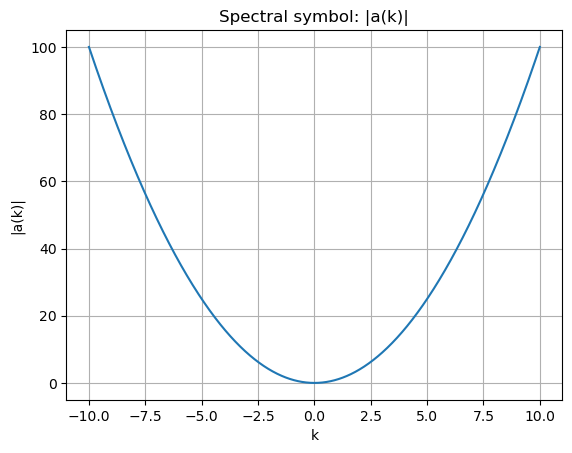


*****************************
* Wave propagation analysis *
*****************************



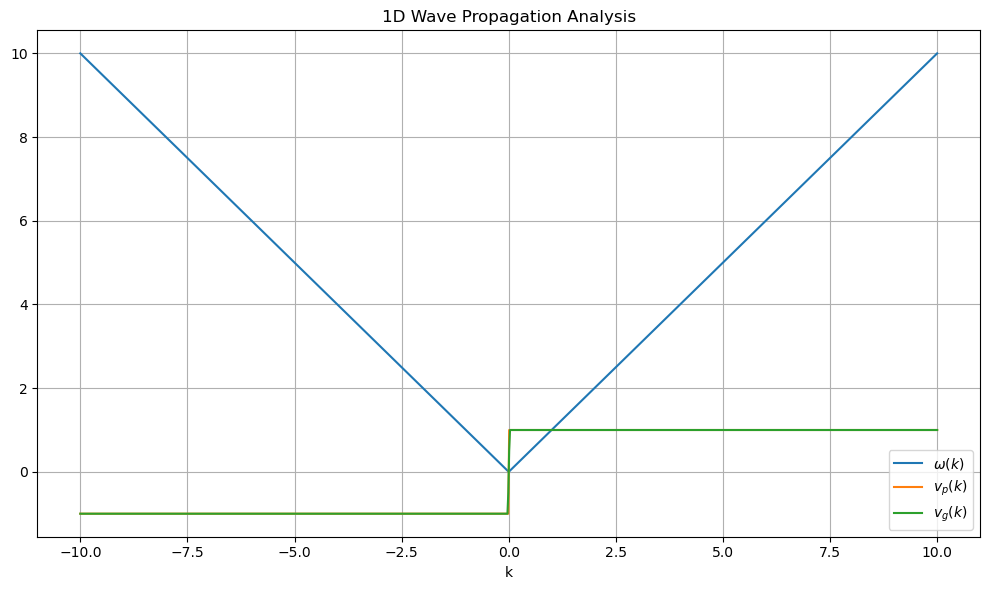


*******************
* Solving the PDE *
*******************

Test error = 1.403e-02


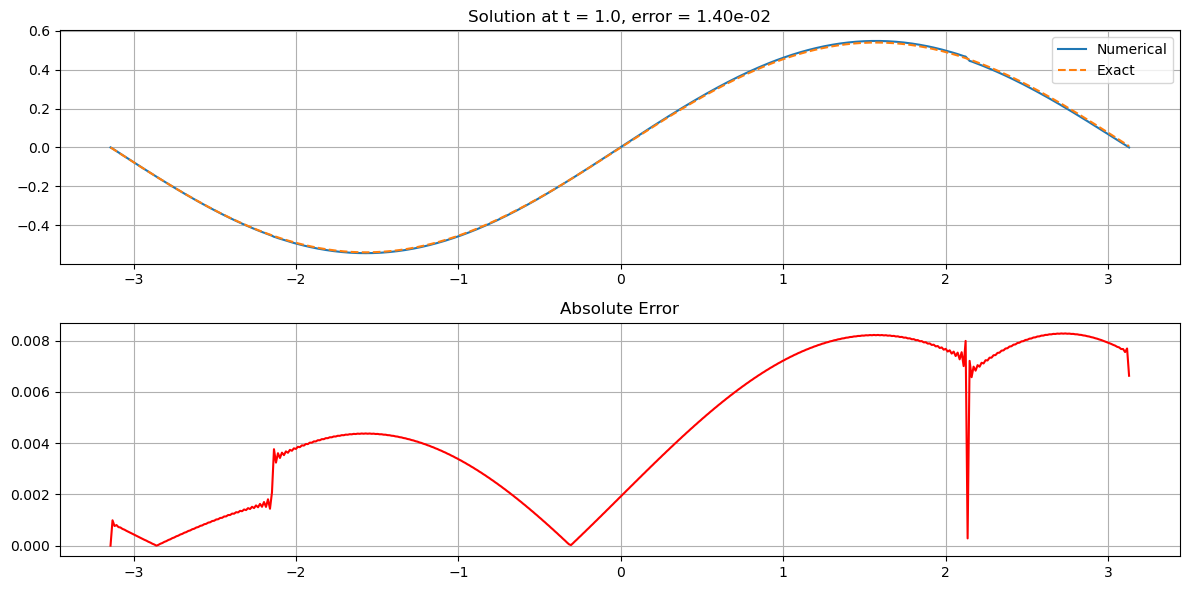

In [5]:
# Define the symbols and the equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

# Wave equation
eq = Eq(diff(u, t, t), diff(u, x, x))

# Create the solver
solver = PDESolver(eq)

# Domain and initial conditions setup
solver.setup(
    Lx=2 * np.pi, Nx=512, Lt=1.0, Nt=400,
    initial_condition=lambda x: np.sin(x),
    initial_velocity=lambda x: np.zeros_like(x)  # ∂u/∂t(x,0) = 0
)

# Solving
solver.solve()

# Exact solution at t = 1
def u_exact(x, t):
    return np.sin(x) * np.cos(t)

# Automatic testing
solver.test(u_exact=u_exact, t_eval=1.0, threshold=2e-2, component='real')



*********************************
* Partial differential equation *
*********************************

                                       2          
∂                       ∂             ∂           
──(u(t, x)) = - u(t, x)⋅──(u(t, x)) + ───(u(t, x))
∂t                      ∂x              2         
                                      ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: u(t, x)*Derivative(u(t, x), x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))

Expanded equation: u(t, x)*Derivative(u(t, x), x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 1
Analyzing term: u(t, x)*Derivative(u(t, x), x)
  --> Classified as nonlinear
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classified as linear
Fi

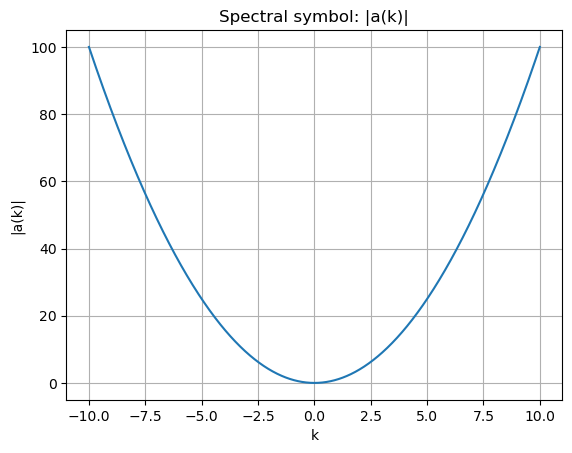


*******************
* Solving the PDE *
*******************



/home/fifi/pdesolver_prod/PDESolver.py:1248: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(z) > 1e-12, (np.exp(z) - 1) / z, 1.0)
/home/fifi/pdesolver_prod/PDESolver.py:1251: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(z) > 1e-12, (np.exp(z) - 1 - z) / z**2, 0.5)


Test error = 3.920e-01


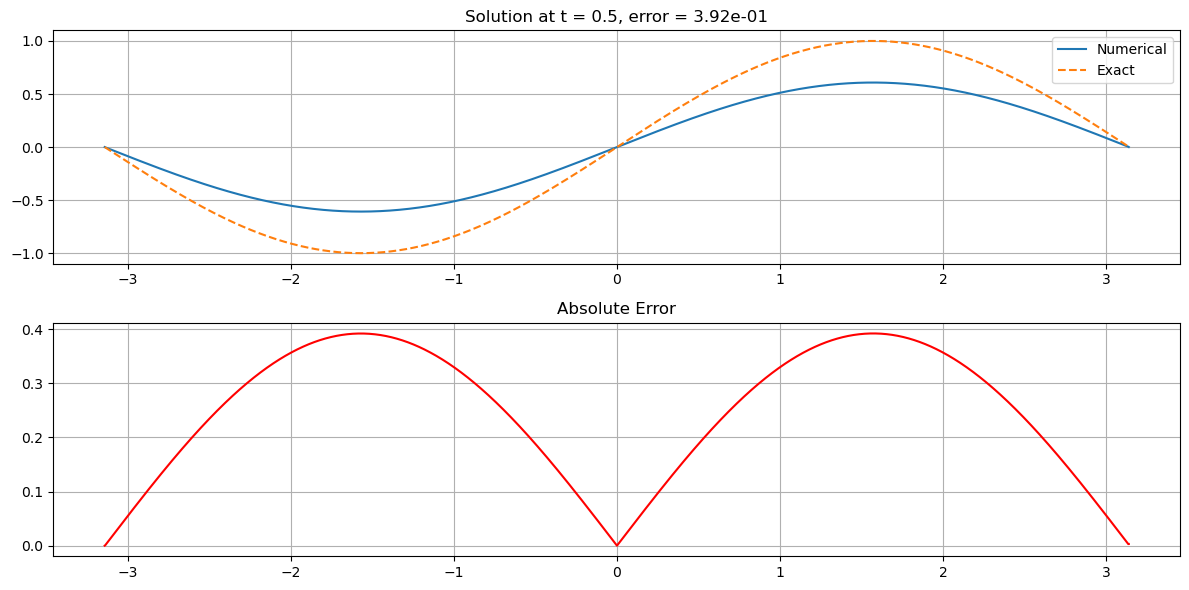

In [6]:
# Define the symbols and the Burgers equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

# Burgers equation
eq = Eq(diff(u, t), diff(u, x, x) - u * diff(u, x))  

# Create the solver with an explicit time scheme (stiffness)
solver = PDESolver(eq, time_scheme="ETD-RK4")

# Domain configuration and initial condition
solver.setup(
    Lx=2 * np.pi, Nx=2048, Lt=0.5, Nt=200,
    initial_condition=lambda x: np.sin(x)
)

# Solving
solver.solve()

# No simple exact solution → check that it does not deviate too much from the initial state
def u_approx(x, t):
    return np.sin(x)  # Naive approximation at t ≈ 0.5

# Test with a larger error threshold
solver.test(u_exact=u_approx, t_eval=0.5, threshold=0.5, component='real')



*********************************
* Partial differential equation *
*********************************

                                       3              
          ∂             ∂             ∂               
6⋅u(t, x)⋅──(u(t, x)) + ──(u(t, x)) - ───(u(t, x)) = 0
          ∂x            ∂t              3             
                                      ∂x              

********************
* Equation parsing *
********************


Equation rewritten in standard form: 6*u(t, x)*Derivative(u(t, x), x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 3))

Expanded equation: 6*u(t, x)*Derivative(u(t, x), x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 3))
Temporal derivative order detected: 1
Analyzing term: 6*u(t, x)*Derivative(u(t, x), x)
  --> Classified as nonlinear
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 3))
  Derivative found: Derivative(u(t, x), (x, 3))
  -

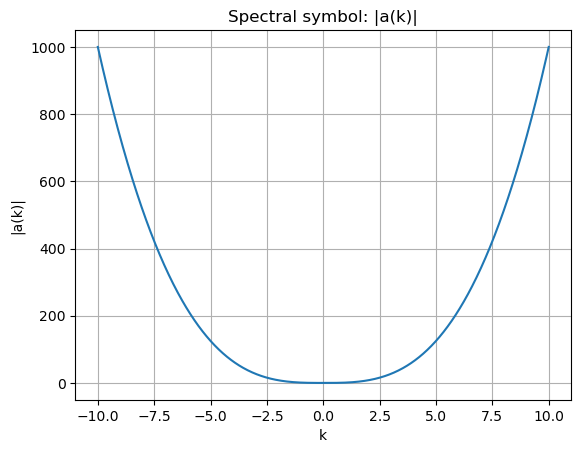


*******************
* Solving the PDE *
*******************

Test error = 2.093e-01


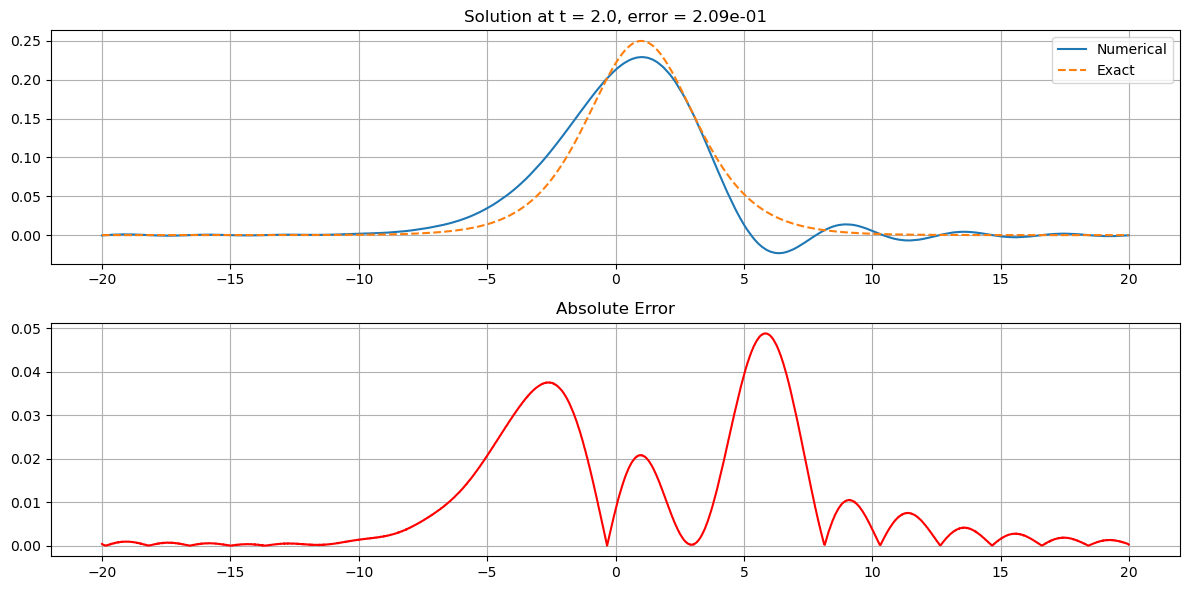

In [7]:
# Define the symbols and the KdV equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)


eq = Eq(diff(u, t) + 6 * u * diff(u, x) - diff(u, x, x, x), 0)  # Standard KdV form

# Soliton parameters
c = 0.5   # Speed and amplitude of the soliton
x0 = 0.0  # Initial position

# Initial condition: centered soliton
initial_condition = lambda x: c / 2 * (1 / np.cosh(np.sqrt(c)/2 * (x - x0)))**2

# Create the solver with periodic boundary conditions and adapted dealiasing
solver = PDESolver(eq, boundary_condition='periodic', time_scheme='ETD-RK4', dealiasing_ratio=1/2)

# Simulation parameters
Lx = 40
Nx = 2048
Lt = 2.0
Nt = 1000

# Setup
solver.setup(Lx=Lx, Nx=Nx, Lt=Lt, Nt=Nt, initial_condition=initial_condition)

# Solve
solver.solve()

# Exact solution at t = Lt
def u_exact(x, t):
    return c / 2 * (1 / np.cosh(np.sqrt(c)/2 * (x - c*t - x0)))**2

# Test
solver.test(u_exact=u_exact, t_eval=Lt, threshold=5e-1, component='real')



*********************************
* Partial differential equation *
*********************************

∂              ∂          
──(u(t, x)) = -──(u(t, x))
∂t             ∂x         

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x), t) + Derivative(u(t, x), x)

Expanded equation: Derivative(u(t, x), t) + Derivative(u(t, x), x)
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: Derivative(u(t, x), x)
  Derivative found: Derivative(u(t, x), x)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1, Derivative(u(t, x), x): 1}
Final nonlinear terms: []
Symbol terms: []

*******************************
* Linear operator computation *
*******************************


Raw characteristic equation:
ⅈ⋅(kx - ω)
Solutions found:
[kx]

--- Final linear operator ---
-ⅈ⋅kx

*****************
* CFL

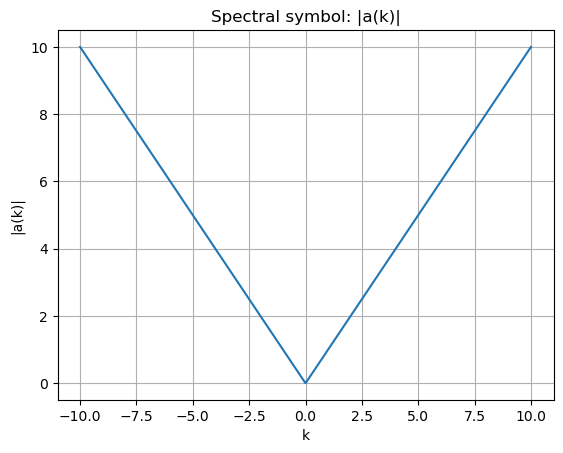


*******************
* Solving the PDE *
*******************

Test error = 1.900e-02


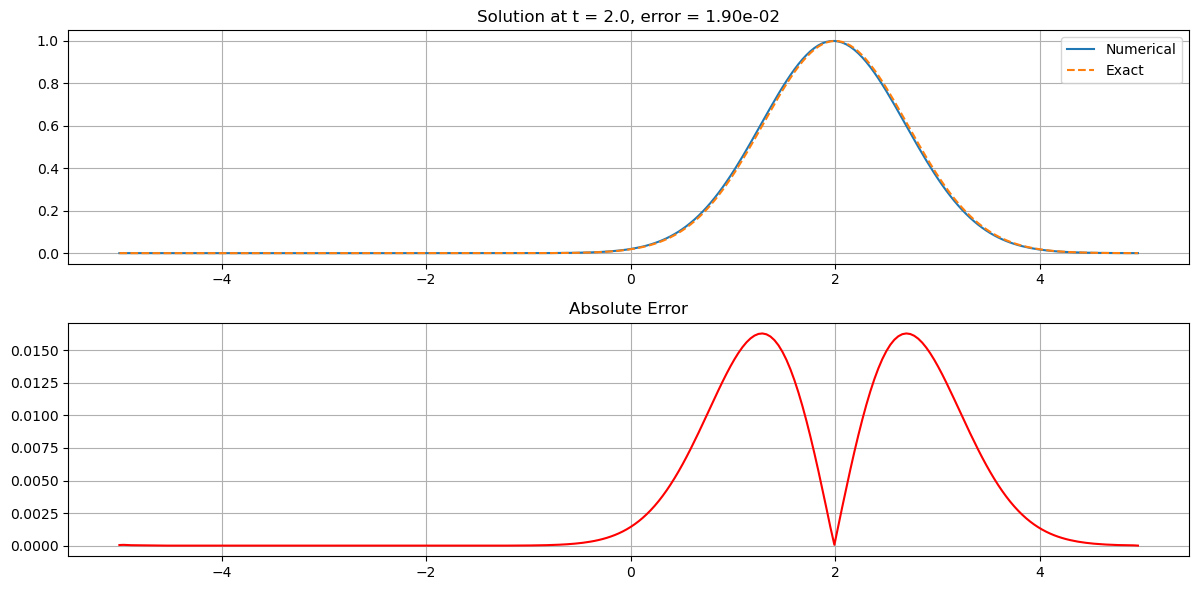

In [8]:
# Define the symbols and the 1D transport equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

eq = Eq(diff(u, t), -diff(u, x))  # Rightward transport at speed +1

# Create the solver with periodic boundary conditions
solver = PDESolver(eq, boundary_condition='periodic')

# Domain setup and initial condition
solver.setup(
    Lx=10, Nx=256, Lt=2.0, Nt=2000,
    initial_condition=lambda x: np.exp(-x**2)
)

# Solving
solver.solve()

# Exact solution at t = 2.0 (with periodic wrapping)
def u_exact(x, t):
    L = 10  # Domain length
    return np.exp(-((x - t + L/2) % L - L/2)**2)

# Automatic testing
solver.test(u_exact=u_exact, t_eval=2.0, threshold=2e-2, component='real')



*********************************
* Partial differential equation *
*********************************

                                       2          
∂                                     ∂           
──(u(t, x)) = (1 - u(t, x))⋅u(t, x) + ───(u(t, x))
∂t                                      2         
                                      ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: -(1 - u(t, x))*u(t, x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))

Expanded equation: u(t, x)**2 - u(t, x) + Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 1
Analyzing term: u(t, x)**2
  --> Classified as nonlinear
Analyzing term: -u(t, x)
  --> Classified as linear
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classifie

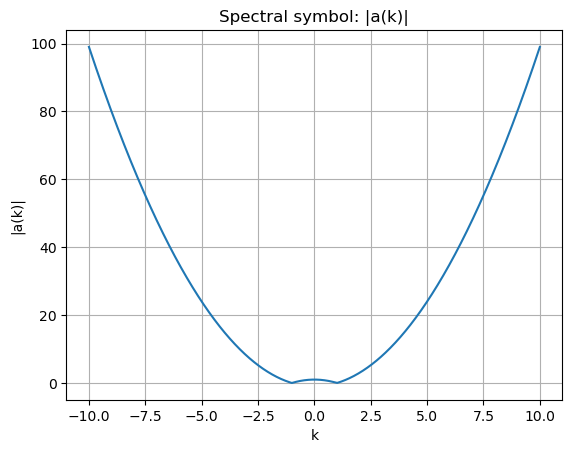


*******************
* Solving the PDE *
*******************

Front position for the 1D Fisher equation = 9.98046875


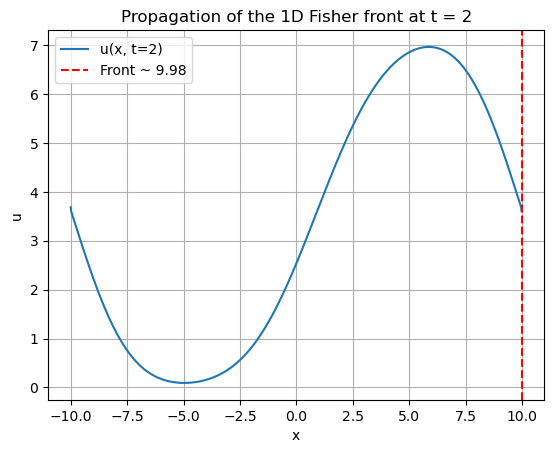

In [9]:
# Define the symbols and Fisher's equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

eq = Eq(diff(u, t), diff(u, x, x) + u * (1 - u))

# Initial condition: sigmoid front localized to the left
initial_condition = lambda x: 1 / (1 + np.exp(-x))**2

# Create the solver with periodic boundary conditions and ETD-RK4 time scheme
solver = PDESolver(eq, boundary_condition='periodic', time_scheme='ETD-RK4')

# Simulation configuration
solver.setup(
    Lx=20, Nx=1024, Lt=2.0, Nt=1000,
    initial_condition=initial_condition
)

# Solve the equation
solver.solve()

# Retrieve the final numerical solution
u_num = solver.frames[-1]
x_grid = solver.X

# Front position detection (threshold value > 0.5)
mask = u_num.real > 0.5
if not np.any(mask):
    raise ValueError("No significant values found for u > 0.5")

front_index = np.where(mask)[0][-1]
x_front = x_grid[front_index]

# Qualitative test: the front has moved to the right (starting from x=0)
print("Front position for the 1D Fisher equation =", x_front)
assert x_front > 0.0, f"The front did not progress (x_front = {x_front})"

# Visualization
plt.plot(x_grid, u_num.real, label="u(x, t=2)")
plt.axvline(x=x_front, color='r', linestyle='--', label=f"Front ~ {x_front:.2f}")
plt.title("Propagation of the 1D Fisher front at t = 2")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.legend()
plt.show()


*********************************
* Partial differential equation *
*********************************

 2                         2          
∂                         ∂           
───(u(t, x)) = -u(t, x) + ───(u(t, x))
  2                         2         
∂t                        ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: u(t, x) + Derivative(u(t, x), (t, 2)) - Derivative(u(t, x), (x, 2))

Expanded equation: u(t, x) + Derivative(u(t, x), (t, 2)) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 2
Analyzing term: u(t, x)
  --> Classified as linear
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classified as linear
Final linear terms: {u(t, x): 1, Derivative(u(t, x), (t, 2)): 1, Derivative(u(t, x), (x, 2)): -1}
Final nonlinear 

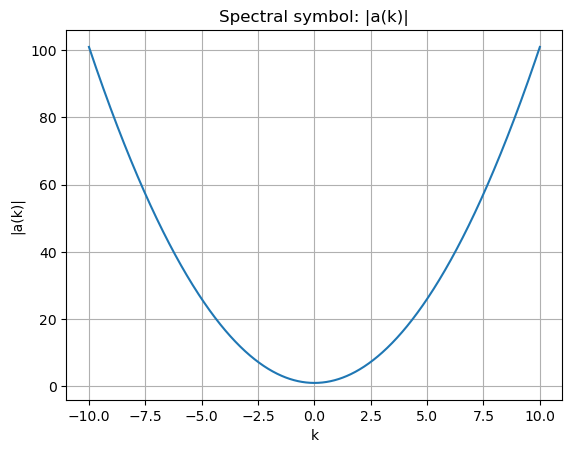


*****************************
* Wave propagation analysis *
*****************************



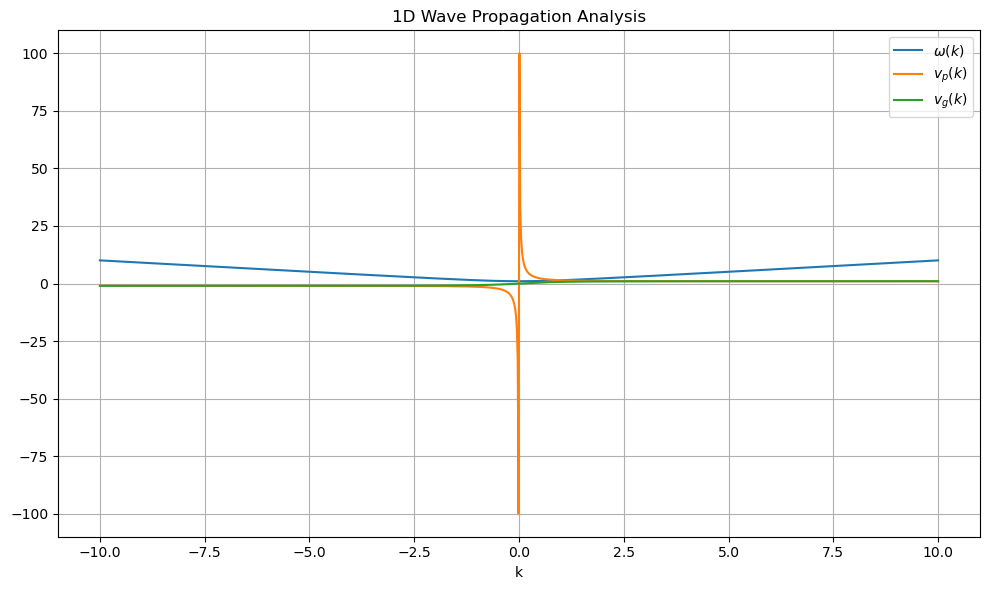


*******************
* Solving the PDE *
*******************

Test error = 3.181e-01


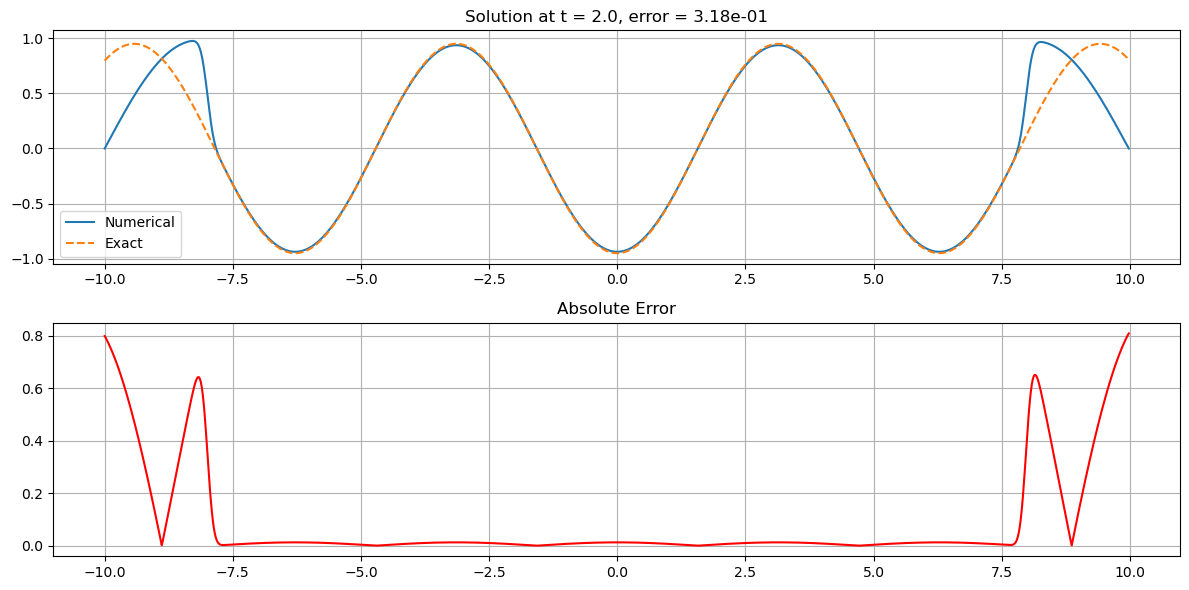

In [10]:
# Define the symbols and the Klein-Gordon equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

eq = Eq(diff(u, t, t), diff(u, x, x) - u)

# Create the solver with ETD-RK4 scheme
solver = PDESolver(eq, boundary_condition='dirichlet', time_scheme='ETD-RK4', dealiasing_ratio=1/2)

# Simulation parameters
solver.setup(
    Lx=20, Nx=1024, Lt=2.0, Nt=200,
    initial_condition=lambda x: np.cos(x),
    initial_velocity=lambda x: np.zeros_like(x)
)

# Solving
solver.solve()

# Exact solution at t = 2: harmonic oscillation with frequency sqrt(2)
def u_exact(x, t):
    return np.cos(np.sqrt(2) * t) * np.cos(x)

# Automatic test
solver.test(u_exact=u_exact, t_eval=2.0, threshold=4e-1, component='real')



*********************************
* Partial differential equation *
*********************************

                 2          
  ∂             ∂           
ⅈ⋅──(u(t, x)) = ───(u(t, x))
  ∂t              2         
                ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: I*Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))

Expanded equation: I*Derivative(u(t, x), t) - Derivative(u(t, x), (x, 2))
Temporal derivative order detected: 1
Analyzing term: I*Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x), (x, 2))
  Derivative found: Derivative(u(t, x), (x, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): I, Derivative(u(t, x), (x, 2)): -1}
Final nonlinear terms: []
Symbol terms: []

*******************************
* Linear operator computation *
*******************************


Raw characteristic equatio

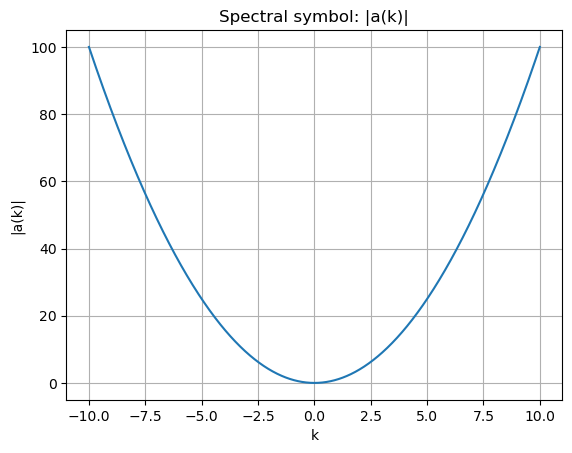


*******************
* Solving the PDE *
*******************

Test error = 6.348e-03


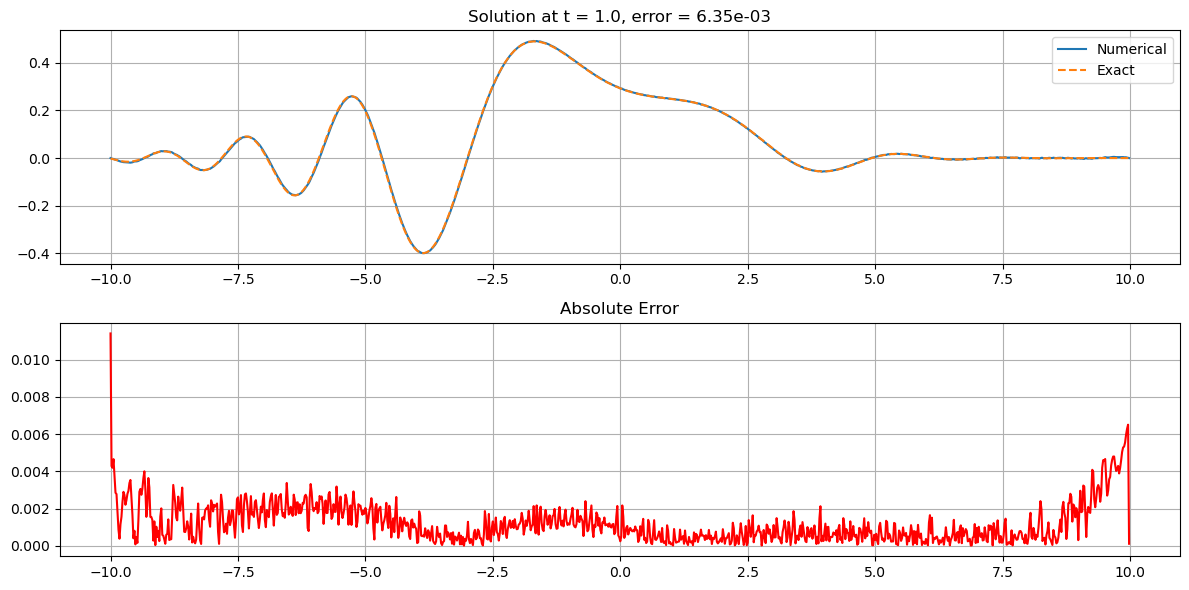

In [11]:
# Définir les symboles et l’équation de Schrödinger 1D
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

eq = Eq(I * diff(u, t), diff(u, x, x))

# Création du solveur avec schéma ETD-RK4
solver = PDESolver(eq, time_scheme='ETD-RK4')

# Configuration du domaine et condition initiale : paquet gaussien modulé
solver.setup(
    Lx=20, Nx=1024, Lt=1.0, Nt=200,
    initial_condition=lambda x: np.exp(-x**2) * np.exp(1j * x)
)

# Résolution
solver.solve()

# Solution exacte (un des deux paquets propagés, ici vers la gauche)
def u_exact(x, t):
    return 1 / np.sqrt(1 - 4j * t) * np.exp(1j * (x + t)) * np.exp(-((x + 2*t)**2) / (1 - 4j * t))

# Test avec erreur sur la norme complexe (amplitude et phase)
solver.test(u_exact=u_exact, t_eval=1.0, threshold=2e-2, component='abs')



*********************************
* Partial differential equation *
*********************************

                4          
∂              ∂           
──(u(t, x)) = -───(u(t, x))
∂t               4         
               ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x), t) + Derivative(u(t, x), (x, 4))

Expanded equation: Derivative(u(t, x), t) + Derivative(u(t, x), (x, 4))
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Analyzing term: Derivative(u(t, x), (x, 4))
  Derivative found: Derivative(u(t, x), (x, 4))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1, Derivative(u(t, x), (x, 4)): 1}
Final nonlinear terms: []
Symbol terms: []

*******************************
* Linear operator computation *
*******************************


Raw characteristic equation:
  4      


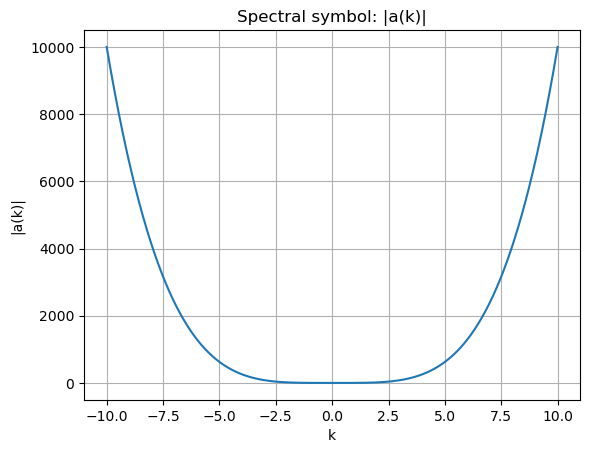


*******************
* Solving the PDE *
*******************

Test error = 6.903e-03


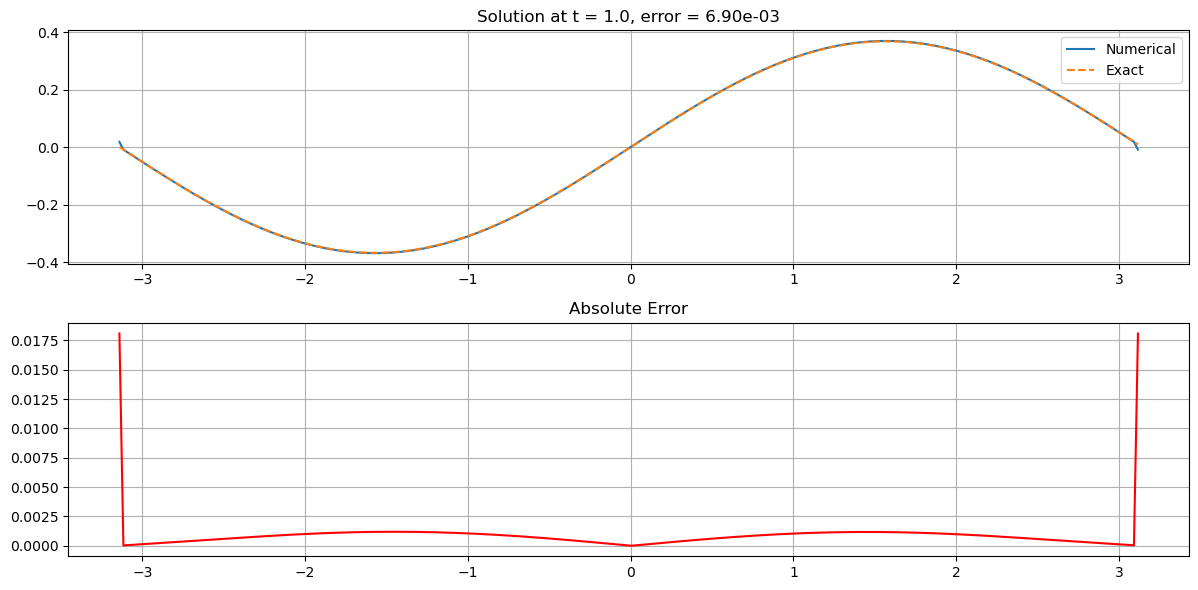

In [12]:
# Definition of the 1D biharmonic equation
t, x, kx = symbols('t x kx')
u_func = Function('u') 
u = u_func(t, x)

biharmonic_eq = Eq(diff(u, t), -diff(u, x, x, x, x))

# Creation of the solver with periodic boundary conditions
solver = PDESolver(biharmonic_eq, boundary_condition='periodic')

# Configuration of the domain and initial condition
Lx = 2 * np.pi
Nx = 256
Lt = 1.0
Nt = 200

solver.setup(
    Lx=Lx, Nx=Nx,
    Lt=Lt, Nt=Nt,
    initial_condition=lambda x: np.sin(x)
)

# Solving
solver.solve()

# Exact solution
def u_exact(x, t):
    return np.sin(x) * np.exp(-t)

# Validation
solver.test(
    u_exact=u_exact,
    t_eval=Lt,
    threshold=1e-2,
    component='real',
    plot=True
)


*********************************
* Partial differential equation *
*********************************

                                2                 2             
∂                 2            ∂                 ∂              
──(u(t, x, y)) = u (t, x, y) + ───(u(t, x, y)) + ───(u(t, x, y))
∂t                               2                 2            
                               ∂x                ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: -u(t, x, y)**2 + Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))

Expanded equation: -u(t, x, y)**2 + Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 1
Analyzing term: -u(t, x, y)**2
  --> Classified as nonlinear
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Analyzing term: 

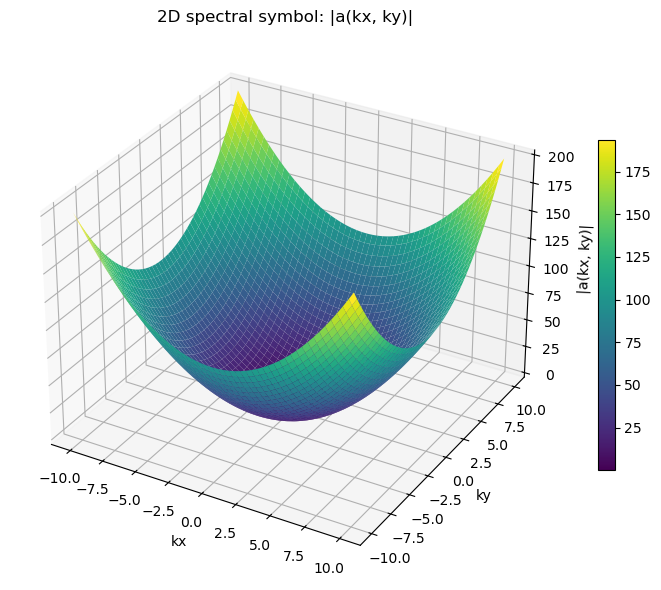


*******************
* Solving the PDE *
*******************

Maximum value for the 2D reaction-diffusion equation = 0.15805312943277539


In [13]:
# Define the symbols and the reaction-diffusion equation
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

eq = Eq(diff(u, t), diff(u, x, x) + diff(u, y, y) + u**2)

# Create the solver
solver = PDESolver(eq)

# Setup: initial Gaussian front
solver.setup(
    Lx=10, Ly=10, Nx=128, Ny=128, Lt=1.0, Nt=200,
    initial_condition=lambda x, y: np.exp(-x**2 - y**2)
)

# Solve
solver.solve()

# Stability analysis: maximum value
u_num = solver.frames[-1]
max_val = np.max(np.abs(u_num))
print("Maximum value for the 2D reaction-diffusion equation =", max_val)
assert max_val < 10, f"Instability detected: max(u) = {max_val}"



*********************************
* Partial differential equation *
*********************************

                  2                 2             
∂                ∂                 ∂              
──(u(t, x, y)) = ───(u(t, x, y)) + ───(u(t, x, y))
∂t                 2                 2            
                 ∂x                ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))

Expanded equation: Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (x, 2))
  Derivative found: Derivative(u(t, x, y), (x, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (y, 2))
  Deriv

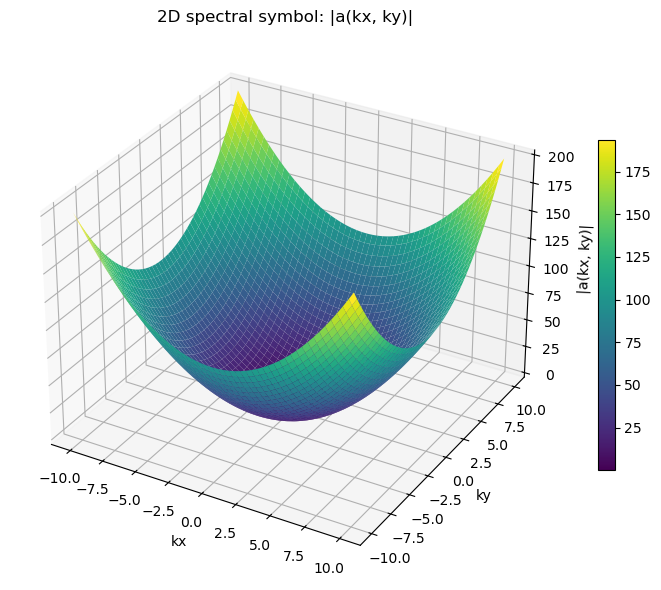


*******************
* Solving the PDE *
*******************

Test error = 5.209e-03


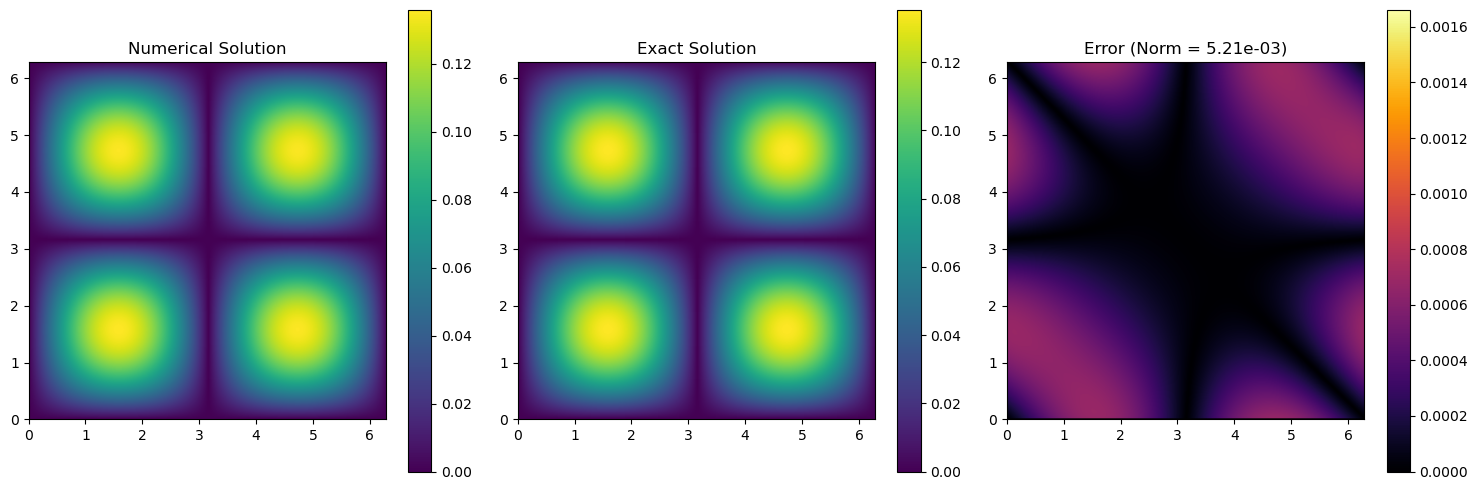

In [14]:
# Define the symbols and the unknown function
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

# Define the 2D Poisson equation
eq = Eq(diff(u, t), diff(u, x, x) + diff(u, y, y))

# Initialize the solver
solver = PDESolver(eq)

# Configure the solver with the problem parameters
solver.setup(
    Lx=2 * np.pi, Ly=2 * np.pi,  # Spatial domain: [0, 2π] × [0, 2π]
    Nx=512, Ny=512,             # Spatial resolution: 512×512 points
    Lt=1.0, Nt=100,             # Total time: 1.0, number of time steps: 100
    initial_condition=lambda x, y: np.sin(x) * np.sin(y),  # Initial condition
    boundary_func=lambda x, y: np.zeros_like(x)  # Boundary conditions (Dirichlet)
)

# Solve the equation
solver.solve()

# Exact solution at t = 1
def u_exact(x, y, t):
    """
    Analytical solution of the 2D Poisson equation.
    The solution is given by u(x, y, t) = sin(x) * sin(y) * exp(-2t).
    """
    return np.sin(x) * np.sin(y) * np.exp(-2.0 * t)

# Comparison with the exact solution at t = 1
solver.test(
    u_exact=lambda x, y, t: np.sin(x) * np.sin(y) * np.exp(-2.0 * t),  # Exact solution
    t_eval=1.0,                                # Evaluation time
    norm='relative',                           # Relative norm
    threshold=1e-2,                            # Acceptable error threshold
    plot=True,                                 # Display plots
    component='real'                           # Compare the real part
)



*********************************
* Partial differential equation *
*********************************

                    2                 2             
  ∂                ∂                 ∂              
ⅈ⋅──(u(t, x, y)) = ───(u(t, x, y)) + ───(u(t, x, y))
  ∂t                 2                 2            
                   ∂x                ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: I*Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))

Expanded equation: I*Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 1
Analyzing term: I*Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (x, 2))
  Derivative found: Derivative(u(t, x, y), (x, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y),

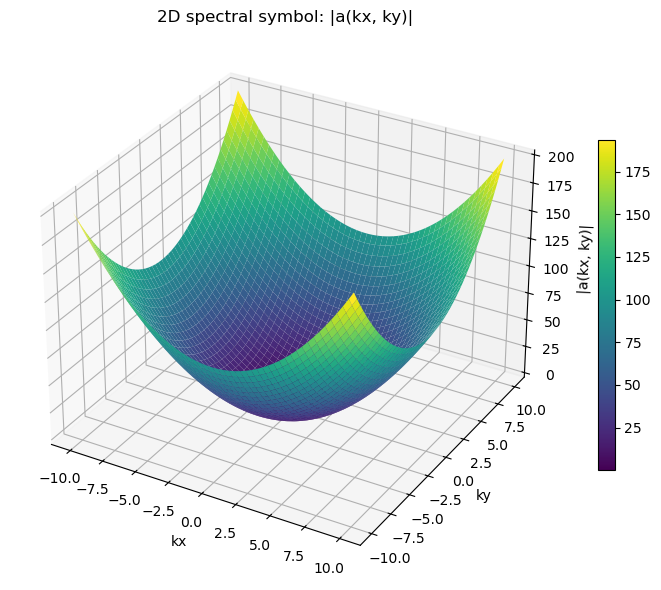


*******************
* Solving the PDE *
*******************

Test error = 1.206e-02


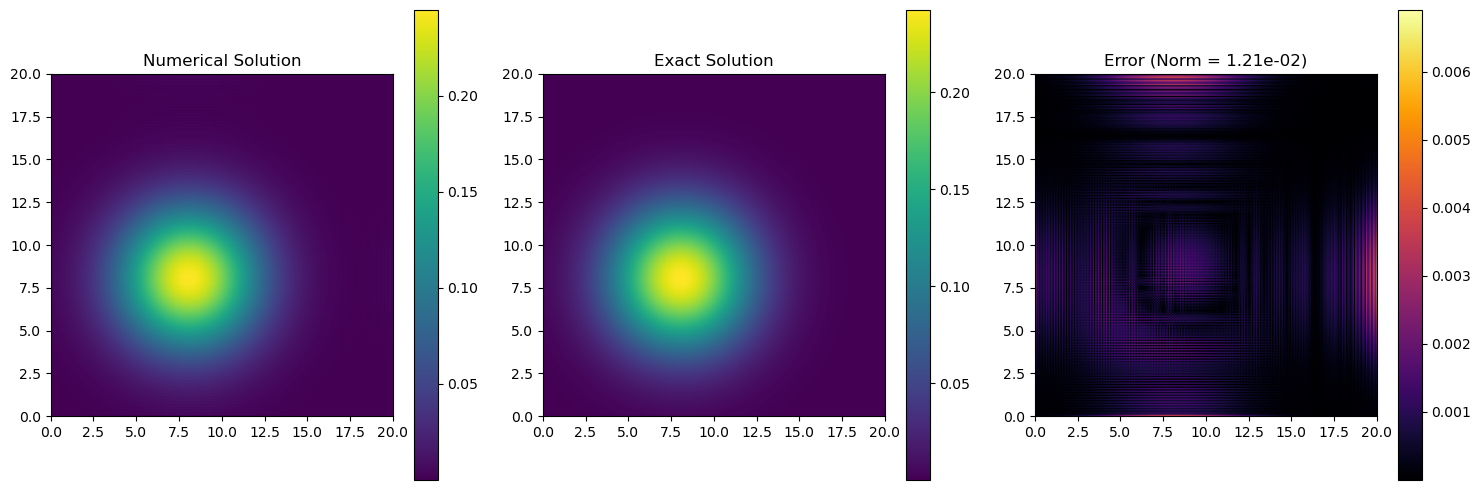

In [15]:
# Define the symbols and the unknown function
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

# 2D Schrödinger equation: i ∂t u = ∂xx u + ∂yy u
eq = Eq(I * diff(u, t), (diff(u, x, x) + diff(u, y, y)))

# Create the solver
solver = PDESolver(eq, boundary_condition='periodic', time_scheme='ETD-RK4')

# Domain
Lx = Ly = 20
Nx = Ny = 256
Lt = 1.0
Nt = 200

# Initial condition: Gaussian wave packet modulated e^{-x^2 - y^2} e^{i(x + y)}
solver.setup(
    Lx=Lx, Ly=Ly, Nx=Nx, Ny=Ny, Lt=Lt, Nt=Nt,
    initial_condition=lambda x, y: np.exp(-x**2 - y**2) * np.exp(1j * (x + y))
)

# Solve the equation
solver.solve()

# Exact solution
def u_exact(x, y, t):
    """
    Analytical solution of the 2D Schrödinger equation.
    The solution is given by:
        u(x, y, t) = 1 / sqrt(1 + 4j * t)**2 * exp(i * (x + y - 2 * t)) * exp(-((x + 2t)^2 + (y + 2t)^2) / (1 + 4j * t)).
    """
    return 1 / np.sqrt(1 + 4j * t)**2 * np.exp(1j * (x + y - 2 * t)) * np.exp(-((x + 2 * t)**2 + (y + 2 * t)**2) / (1 + 4j * t))

# Comparison with the exact solution at t = 1
solver.test(
    u_exact=lambda x, y, t: u_exact(x, y, t),  # Exact solution
    t_eval=1.0,                                # Evaluation time
    norm='relative',                           # Relative norm
    threshold=2e-2,                            # Acceptable error threshold
    plot=True,                                 # Display plots
    component='abs'                            # Compare the complex norm
)



*********************************
* Partial differential equation *
*********************************

 2                 2                 2             
∂                 ∂                 ∂              
───(u(t, x, y)) = ───(u(t, x, y)) + ───(u(t, x, y))
  2                 2                 2            
∂t                ∂x                ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x, y), (t, 2)) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))

Expanded equation: Derivative(u(t, x, y), (t, 2)) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 2
Analyzing term: Derivative(u(t, x, y), (t, 2))
  Derivative found: Derivative(u(t, x, y), (t, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (x, 2))
  Derivative found: Derivative(u(t, x, y), (x, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(

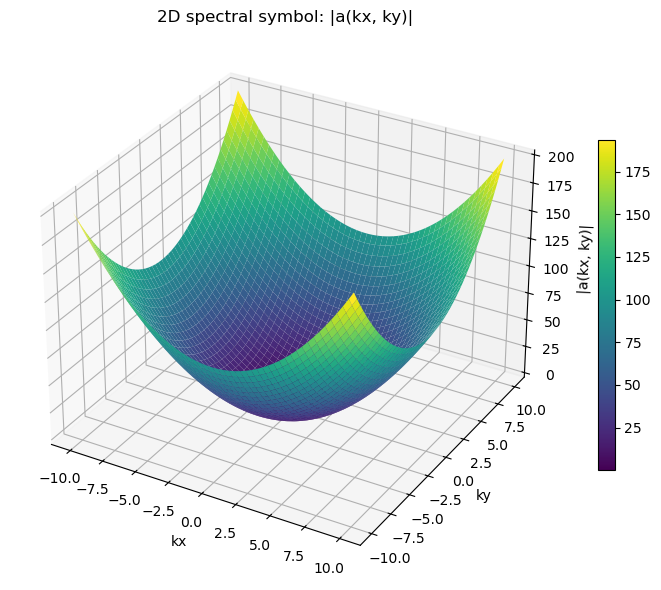


*****************************
* Wave propagation analysis *
*****************************



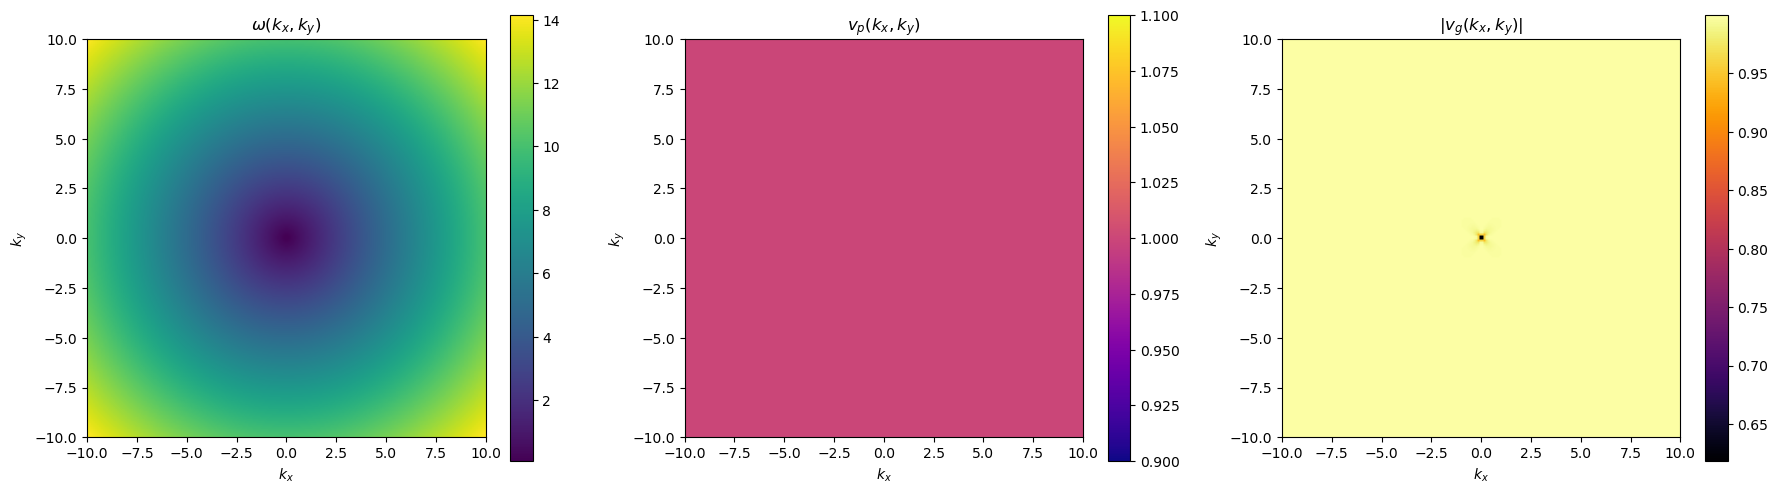


*******************
* Solving the PDE *
*******************



/home/fifi/pdesolver_prod/PDESolver.py:1289: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(z) > 1e-12, (np.exp(z) - 1) / z, 1.0)
/home/fifi/pdesolver_prod/PDESolver.py:1292: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(z) > 1e-12, (np.exp(z) - 1 - z) / z**2, 0.5)


Test error = 4.353e-02


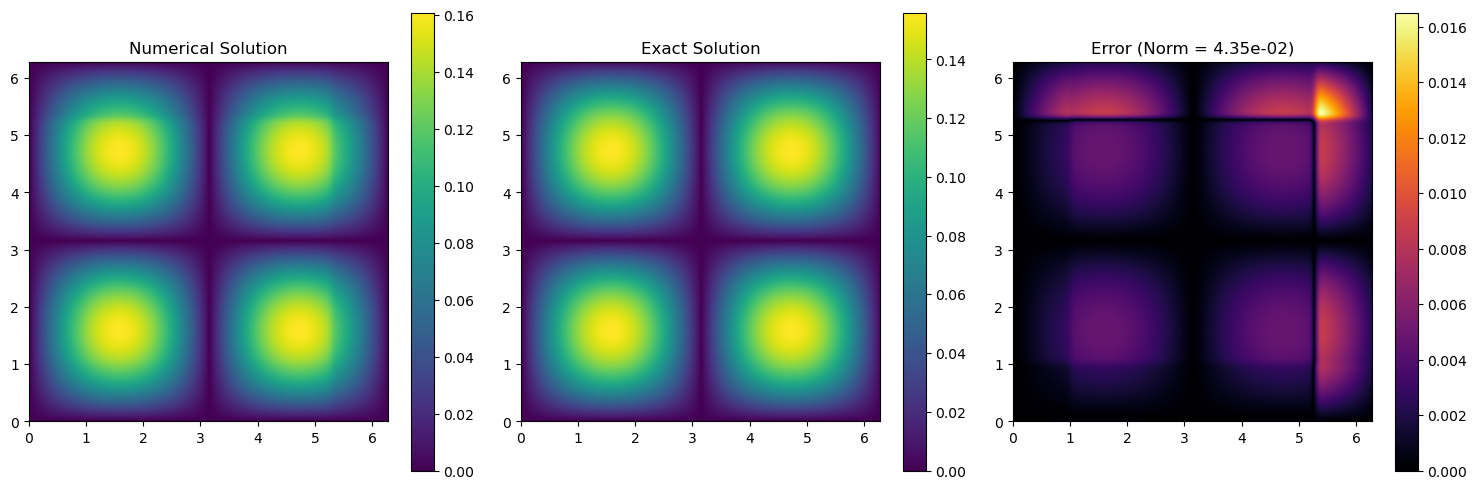

In [16]:
# Define the symbols and the unknown function
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

# 2D wave equation
eq = Eq(diff(u, t, t), diff(u, x, x) + diff(u, y, y))

# Initialize the solver
solver = PDESolver(eq, boundary_condition='dirichlet', time_scheme='ETD-RK4')

# Parameters
Lx = Ly = 2 * np.pi
Nx = Ny = 512
Lt = 1.0
Nt = 200

# Configure the solver with the problem parameters
solver.setup(
    Lx=Lx, Ly=Ly, Nx=Nx, Ny=Ny, Lt=Lt, Nt=Nt,
    initial_condition=lambda x, y: np.sin(x) * np.sin(y),
    initial_velocity=lambda x, y: np.zeros_like(x),
    boundary_func=lambda x, y: np.zeros_like(x)
)

# Solve the equation
solver.solve()

# Exact solution: sin(x) sin(y) cos(ωt), with ω = sqrt(2)
def u_exact(x, y, t):
    """
    Analytical solution of the 2D wave equation.
    The solution is given by u(x, y, t) = sin(x) * sin(y) * cos(ωt),
    where ω = sqrt(kx^2 + ky^2) = sqrt(1^2 + 1^2).
    """
    omega = np.sqrt(1**2 + 1**2)
    return np.sin(x) * np.sin(y) * np.cos(omega * t)

# Comparison with the exact solution at t = 1
solver.test(
    u_exact=lambda x, y, t: u_exact(x, y, t),  # Exact solution
    t_eval=1.0,                                # Evaluation time
    norm='relative',                           # Relative norm
    threshold=5e-2,                            # Acceptable error threshold
    plot=True,                                 # Display plots
    component='real'                           # Compare the real part
)



*********************************
* Partial differential equation *
*********************************

                  2                 2             
∂                ∂                 ∂              
──(u(t, x, y)) = ───(u(t, x, y)) + ───(u(t, x, y))
∂t                 2                 2            
                 ∂x                ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))

Expanded equation: Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (x, 2))
  Derivative found: Derivative(u(t, x, y), (x, 2))
  --> Classified as linear
Analyzing term: -Derivative(u(t, x, y), (y, 2))
  Deriv

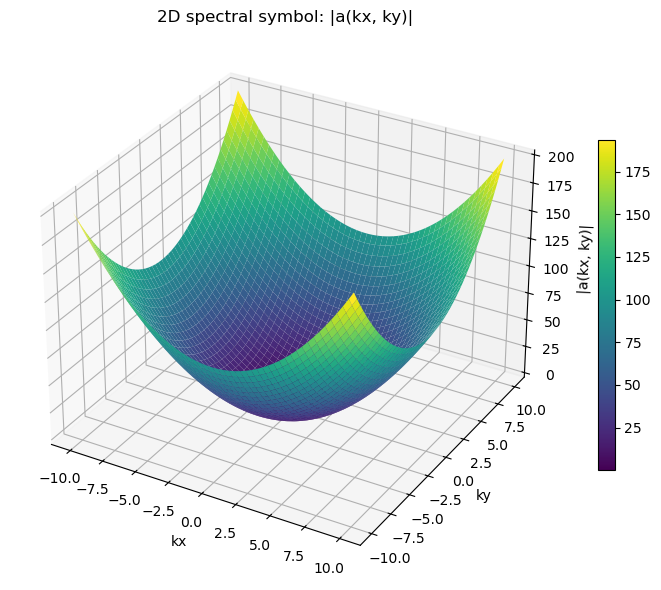


*******************
* Solving the PDE *
*******************

Test error = 2.069e-02


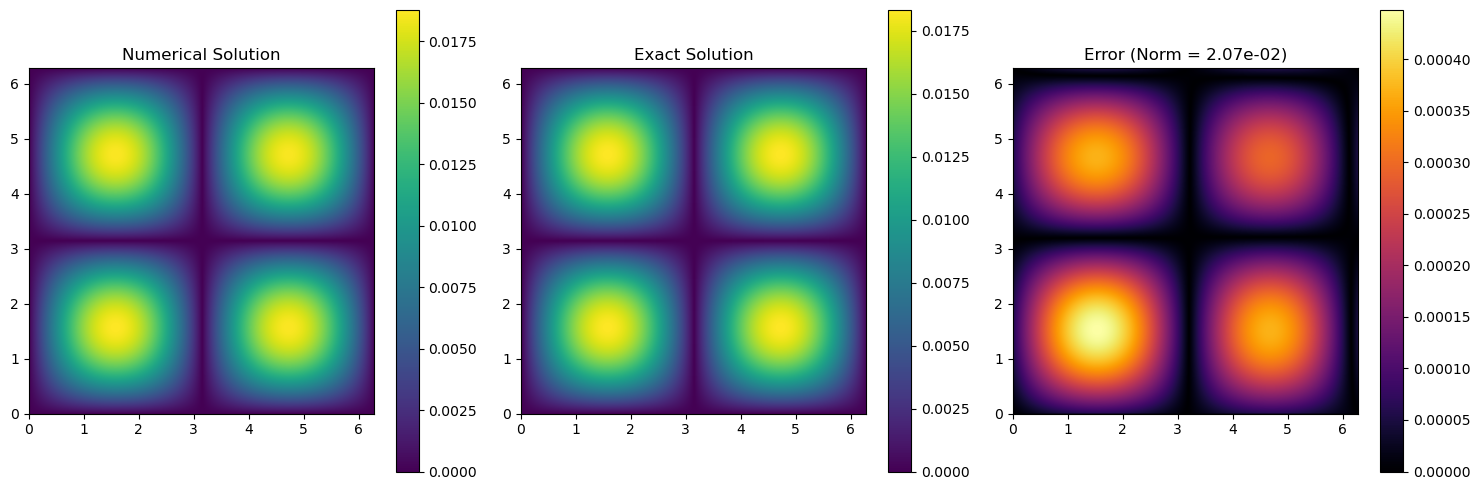

In [17]:
# Definition of the 2D heat equation
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

heat_eq = Eq(diff(u, t), diff(u, x, x) + diff(u, y, y))

# Creation of the solver
solver = PDESolver(heat_eq, boundary_condition='dirichlet')

# Configuration of the domain and initial conditions
L = 2 * np.pi  # Square domain [0, 2π] × [0, 2π]
N = 1024         # Grid points per dimension
T_final = 2.0  # Final time

solver.setup(
    Lx=L, Ly=L,
    Nx=N, Ny=N,
    Lt=T_final, Nt=200,
    initial_condition=lambda x, y: np.sin(x) * np.sin(y)
)

# Solving
solver.solve()

# Exact solution for validation
def exact_solution(x, y, t):
    return np.sin(x) * np.sin(y) * np.exp(-2 * t)

# Numerical validation
solver.test(
    u_exact=exact_solution,
    t_eval=T_final,
    threshold=3e-2,
    component='real',
    plot=True
)


*********************************
* Partial differential equation *
*********************************

∂                  ∂                ∂             
──(u(t, x, y)) = - ──(u(t, x, y)) - ──(u(t, x, y))
∂t                 ∂x               ∂y            

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x, y), t) + Derivative(u(t, x, y), x) + Derivative(u(t, x, y), y)

Expanded equation: Derivative(u(t, x, y), t) + Derivative(u(t, x, y), x) + Derivative(u(t, x, y), y)
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x, y), t)
  --> Classified as linear
Analyzing term: Derivative(u(t, x, y), x)
  Derivative found: Derivative(u(t, x, y), x)
  --> Classified as linear
Analyzing term: Derivative(u(t, x, y), y)
  Derivative found: Derivative(u(t, x, y), y)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x, y), t): 1, Derivative(u(t, x, y),

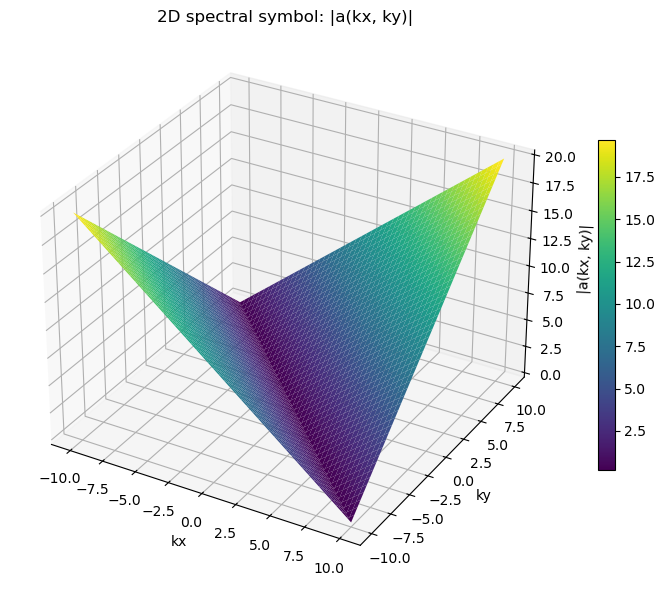


*******************
* Solving the PDE *
*******************

Test error = 2.687e-02


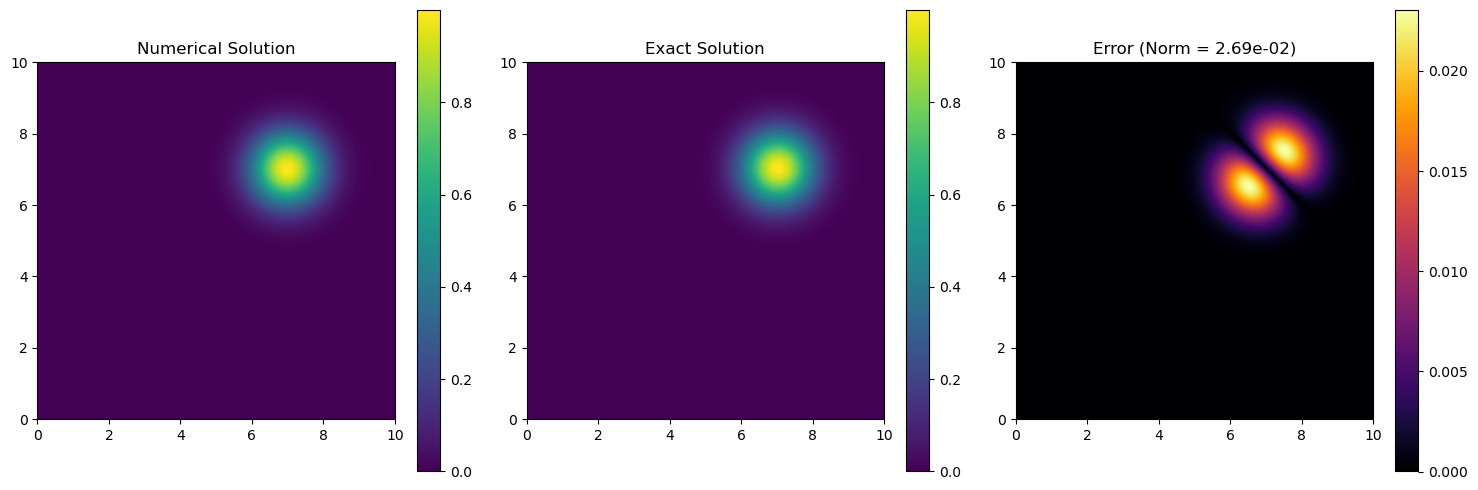

In [18]:
# Definition of the 2D transport equation
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

transport_eq = Eq(diff(u, t), -diff(u, x) - diff(u, y))  # Diagonal transport

# Creation of the solver with periodic conditions
solver = PDESolver(transport_eq, boundary_condition='periodic')

# Configuration of the 2D domain and initial condition
L = 10.0  # Square domain [-5, 5] × [-5, 5]
N = 512   # Spatial resolution

solver.setup(
    Lx=L, Ly=L,
    Nx=N, Ny=N,
    Lt=2.0, Nt=2000,
    initial_condition=lambda x, y: np.exp(-(x**2 + y**2))  # 2D Gaussian
)

# Exact solution with periodic wrapping
def u_exact(x, y, t):
    Lx = Ly = L  # Square domain
    x_shift = (x - t + Lx/2) % Lx - Lx/2  # Periodic wrapping in x
    y_shift = (y - t + Ly/2) % Ly - Ly/2  # Periodic wrapping in y
    return np.exp(-(x_shift**2 + y_shift**2))

# Solving and validation
solver.solve()
solver.test(
    u_exact=u_exact,
    t_eval=2.0,
    threshold=3e-2,
    component='real',
    plot=True
)



*********************************
* Partial differential equation *
*********************************

 2                                       2                     2             
∂                                       ∂                     ∂              
───(u(t, x, y)) = -1.0⋅u(t, x, y) + 1.0⋅───(u(t, x, y)) + 1.0⋅───(u(t, x, y))
  2                                       2                     2            
∂t                                      ∂x                    ∂y             

********************
* Equation parsing *
********************


Equation rewritten in standard form: 1.0*u(t, x, y) + Derivative(u(t, x, y), (t, 2)) - 1.0*Derivative(u(t, x, y), (x, 2)) - 1.0*Derivative(u(t, x, y), (y, 2))

Expanded equation: 1.0*u(t, x, y) + Derivative(u(t, x, y), (t, 2)) - 1.0*Derivative(u(t, x, y), (x, 2)) - 1.0*Derivative(u(t, x, y), (y, 2))
Temporal derivative order detected: 2
Analyzing term: 1.0*u(t, x, y)
  --> Classified as linear
Analyzing term: Derivative(u(t, x, y), (t, 

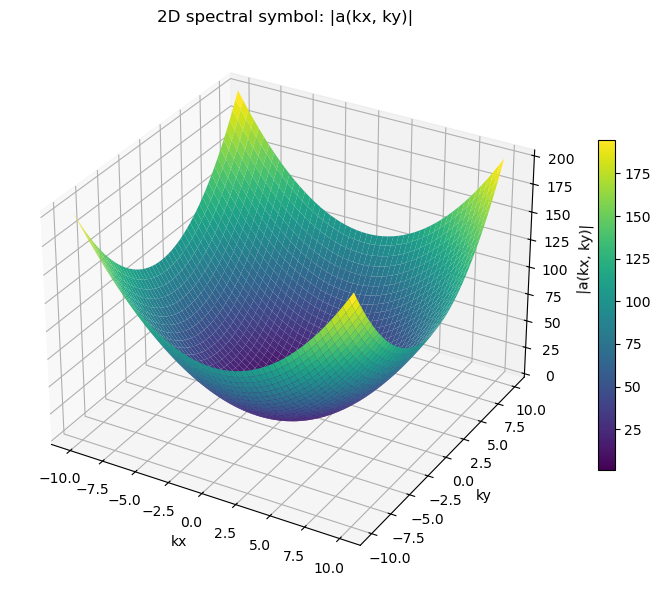


*****************************
* Wave propagation analysis *
*****************************



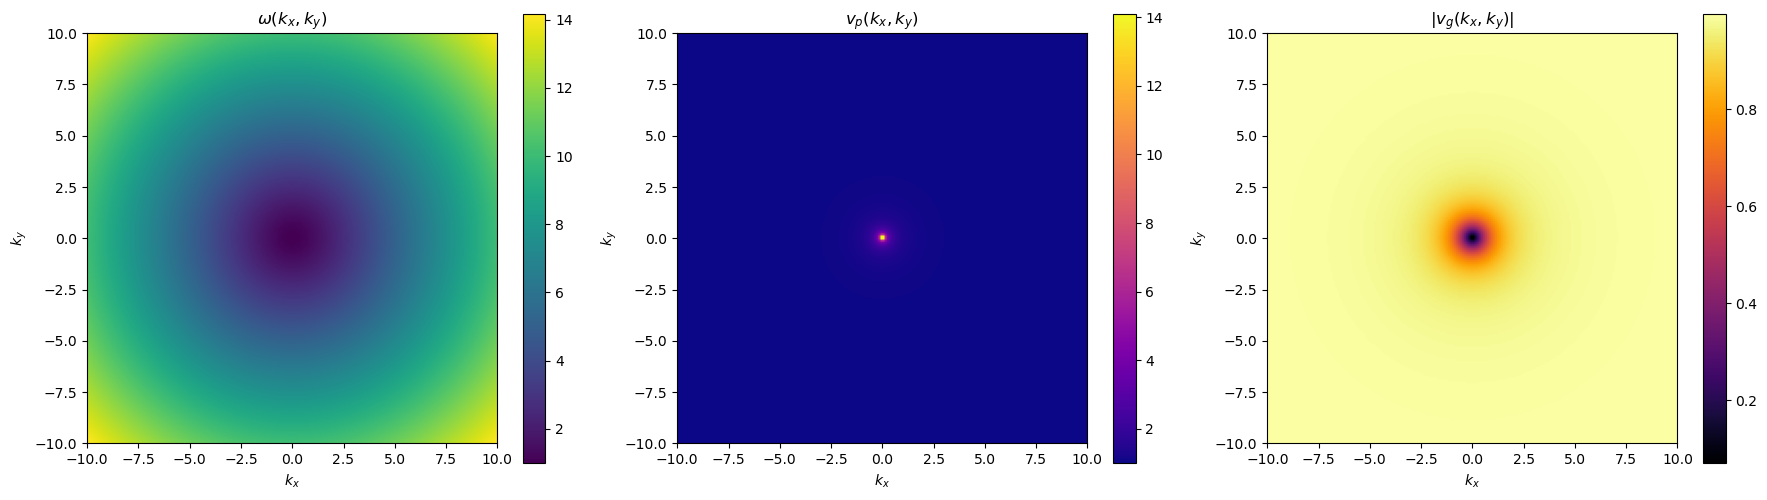


*******************
* Solving the PDE *
*******************

Test error = 1.349e-02


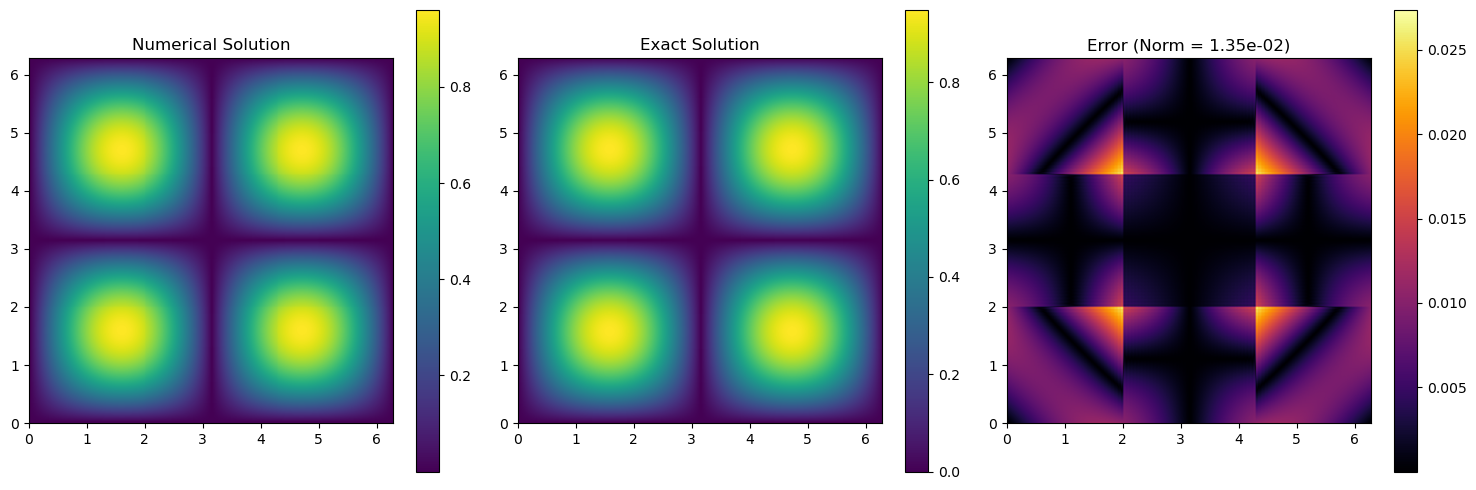

In [19]:
# Physical parameters
c = 1.0  # Wave speed
m = 1.0  # Field mass

# Definition of the 2D Klein-Gordon equation
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

klein_gordon_eq = Eq(diff(u, t, t), c**2*(diff(u, x, x) + diff(u, y, y)) - m**2*u)

# Creation of the solver with periodic boundary conditions
solver = PDESolver(klein_gordon_eq, boundary_condition='periodic')

# Domain configuration
L = 2 * np.pi  # Square domain [0, 2π] × [0, 2π]
N = 512        # Grid points per dimension
T_final = 2.0  # Final time
Nt = 200       # Time steps

# Initial conditions
kx = 1
ky = 1
omega = np.sqrt(c**2*(kx**2 + ky**2) + m**2)  # Direct numerical calculation

solver.setup(
    Lx=L, Ly=L,
    Nx=N, Ny=N,
    Lt=T_final, Nt=Nt,
    initial_condition=lambda x, y: np.sin(x) * np.sin(y),
    initial_velocity=lambda x, y: np.zeros_like(x)  # Initial time derivative is zero
)

# Replace the definition of the exact solution with:
omega_val = float(np.sqrt(c**2*(kx**2 + ky**2) + m**2))  # Convert to float

def exact_solution(x, y, t):
    return np.sin(x) * np.sin(y) * np.cos(omega_val * t)

# Solving and validation
solver.solve()
solver.test(
    u_exact=exact_solution,
    t_eval=T_final,
    threshold=2e-2,
    component='real',
    plot=True
)



*********************************
* Partial differential equation *
*********************************

                    4                 4                     4               
∂                  ∂                 ∂                     ∂                
──(u(t, x, y)) = - ───(u(t, x, y)) - ───(u(t, x, y)) - 2⋅───────(u(t, x, y))
∂t                   4                 4                   2   2            
                   ∂x                ∂y                  ∂y  ∂x             

********************
* Equation parsing *
********************


Equation rewritten in standard form: Derivative(u(t, x, y), t) + Derivative(u(t, x, y), (x, 4)) + Derivative(u(t, x, y), (y, 4)) + 2*Derivative(u(t, x, y), (x, 2), (y, 2))

Expanded equation: Derivative(u(t, x, y), t) + Derivative(u(t, x, y), (x, 4)) + Derivative(u(t, x, y), (y, 4)) + 2*Derivative(u(t, x, y), (x, 2), (y, 2))
Temporal derivative order detected: 1
Analyzing term: Derivative(u(t, x, y), t)
  Derivative found: Derivative(u(t, x,

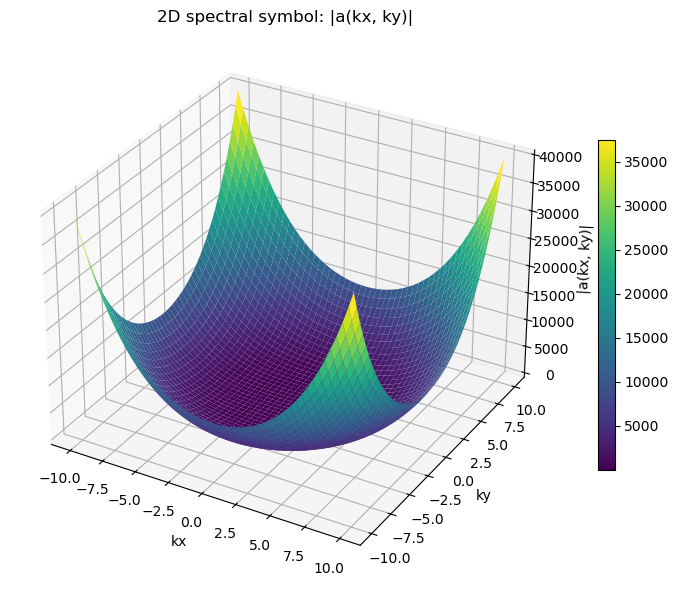


*******************
* Solving the PDE *
*******************

Test error = 1.997e-02


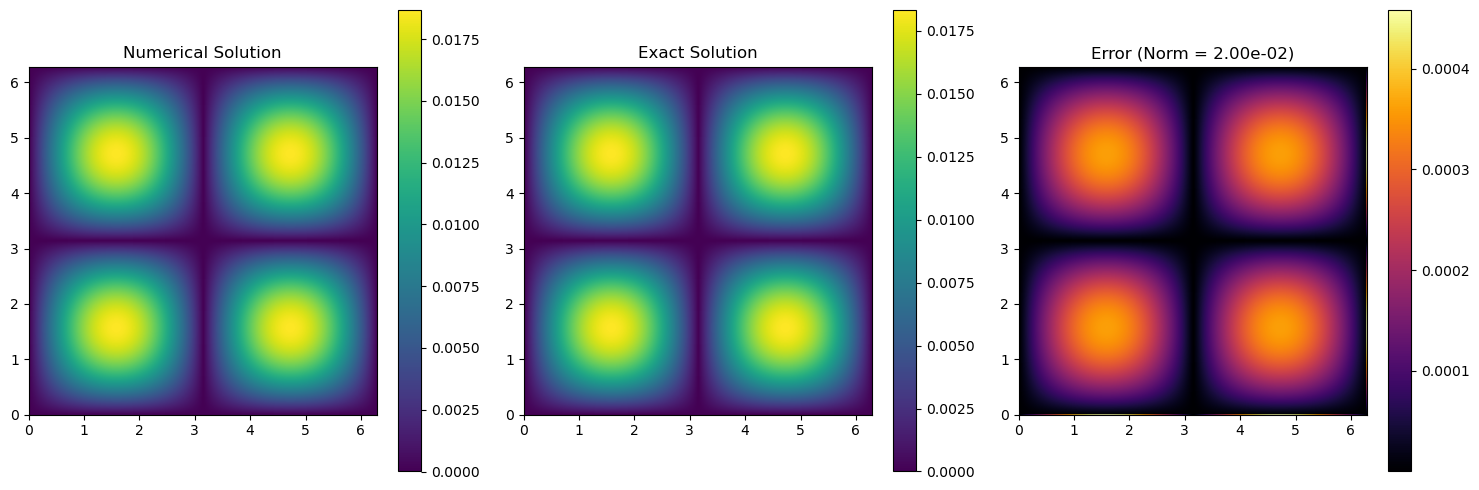

In [20]:
# Definition of the 2D biharmonic equation
t, x, y, kx, ky = symbols('t x y kx ky')
u_func = Function('u') 
u = u_func(t, x, y)

biharmonic_eq = Eq(diff(u, t), -(diff(u, x, 4) + 2*diff(u, x, 2, y, 2) + diff(u, y, 4)))

# Creation of the solver with periodic boundary conditions
solver = PDESolver(biharmonic_eq, boundary_condition='periodic')

# Configuration of the domain
L = 2 * np.pi  # Square domain [0, 2π] × [0, 2π]
N = 512         # Grid points per dimension
T_final = 1.0  # Final time
Nt = 200       # Time steps

# Initial sinusoidal 2D condition
initial_condition = lambda x, y: np.sin(x) * np.sin(y)

solver.setup(
    Lx=L, Ly=L,
    Nx=N, Ny=N,
    Lt=T_final, Nt=Nt,
    initial_condition=initial_condition
)

# Corresponding exact solution
def u_exact(x, y, t):
    return np.sin(x) * np.sin(y) * np.exp(-4*t)

# Solving and validation
solver.solve()
solver.test(u_exact=u_exact, t_eval=T_final, threshold=5e-1, component='real')